# Notebook 0 — Super Bowl Dataset Overview & EDA

## 1. Introduction

This notebook provides an **overview and exploratory data analysis (EDA)** of the historical Super Bowl dataset (1967–2020).  
The aim is to understand the dataset, describe its main features, and identify trends and patterns that may be relevant for further machine learning analysis in the later notebooks.

**Group Members:**
- Pedro Ribeiro — 27960  
- Ricardo Fernandes — 27961  
- Carolina Branco — 27983  
- João Barbosa — 27964  
- Diogo Abreu — 27975  

---

## 2. Business Goals

The main business goals for analyzing this dataset are:

1. Understand historical trends in Super Bowl games (points scored, competitiveness, venue distribution, MVP statistics).  
2. Identify patterns that may inform future prediction tasks, such as:
   - High scoring games
   - Competitive vs one-sided games
   - Team performance trends over time  
3. Provide actionable insights for sports analysts, commentators, and enthusiasts.  

---

## 3. Dataset Description

The dataset contains information about **all Super Bowl games from 1967 to 2020**.  
It includes ~54 rows (one per Super Bowl) and the following features:

| Attribute     | Type        | Description |
|---------------|------------|-------------|
| Date          | Date       | Date of the Super Bowl |
| SB            | Categorical| Super Bowl identifier (e.g., LIV) |
| Winner        | Categorical| Winning team |
| Winner Pts    | Numeric    | Points scored by winning team |
| Loser         | Categorical| Losing team |
| Loser Pts     | Numeric    | Points scored by losing team |
| MVP           | Categorical| Most Valuable Player |
| Stadium       | Categorical| Stadium name |
| City          | Categorical| City of the stadium |
| State         | Categorical| State of the stadium |

**Source:** [Kaggle – Super Bowl History Analysis](https://www.kaggle.com/code/ahmadjaved097/superbowl-history-analysis/notebook)

---

## 4. Load Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
superbowl_df = pd.read_csv("superbowl.csv")

# Convert date to datetime
superbowl_df['Date'] = pd.to_datetime(superbowl_df['Date'])
superbowl_df['Year'] = superbowl_df['Date'].dt.year

# Show top rows
superbowl_df.head()

,Date,SB,Winner,Winner Pts,Loser,Loser Pts,MVP,Stadium,City,State,Year
0,2020-02-02,LIV (54),Kansas City Chiefs,31,San Francisco 49ers,20,Patrick Mahomes,Hard Rock Stadium,Miami Gardens,Florida,2020
1,2019-02-03,LIII (53),New England Patriots,13,Los Angeles Rams,3,Julian Edelman,Mercedes-Benz Stadium,Atlanta,Georgia,2019
2,2018-02-04,LII (52),Philadelphia Eagles,41,New England Patriots,33,Nick Foles,U.S. Bank Stadium,Minneapolis,Minnesota,2018
3,2017-02-05,LI (51),New England Patriots,34,Atlanta Falcons,28,Tom Brady,NRG Stadium,Houston,Texas,2017
4,2016-02-07,50,Denver Broncos,24,Carolina Panthers,10,Von Miller,Levi's Stadium,Santa Clara,California,2016



---

# 5. Dataset Overview

In [2]:
# Basic info
superbowl_df.info()

# Statistical description of numeric columns
superbowl_df.describe().round(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        54 non-null     datetime64[ns]
 1   SB          54 non-null     object        
 2   Winner      54 non-null     object        
 3   Winner Pts  54 non-null     int64         
 4   Loser       54 non-null     object        
 5   Loser Pts   54 non-null     int64         
 6   MVP         54 non-null     object        
 7   Stadium     54 non-null     object        
 8   City        54 non-null     object        
 9   State       54 non-null     object        
 10  Year        54 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(2), object(7)
memory usage: 4.6+ KB


,Date,Winner Pts,Loser Pts,Year
count,54,54.00,54.00,54.00
mean,1993-07-27 14:13:20,30.11,16.20,1993.50
min,1967-01-15 00:00:00,13.00,3.00,1967.00
25%,1980-04-21 18:00:00,23.25,10.00,1980.25
50%,1993-08-01 00:00:00,30.50,17.00,1993.50
75%,2006-11-05 00:00:00,35.00,21.00,2006.75
max,2020-02-02 00:00:00,55.00,33.00,2020.00
std,NaN,9.77,7.41,15.73


- Number of rows: 54

- Number of numeric columns: 2 (Winner Pts, Loser Pts)

- Number of categorical columns: 8

- No missing values


---

# 6. Exploratory Data Analysis (EDA)

## 6.1 Points Scored Over Time

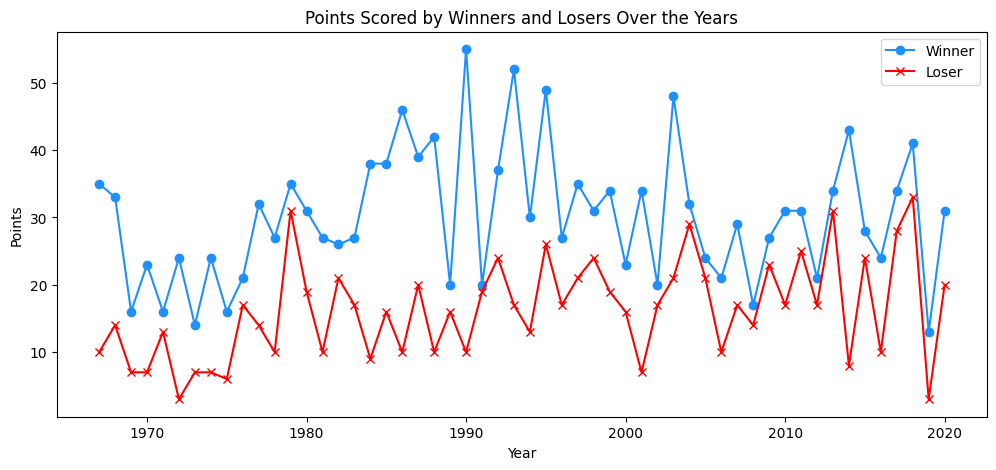

In [3]:
plt.figure(figsize=(12,5))
plt.plot(superbowl_df['Year'], superbowl_df['Winner Pts'], marker='o', label='Winner', color='dodgerblue')
plt.plot(superbowl_df['Year'], superbowl_df['Loser Pts'], marker='x', label='Loser', color='red')
plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Points Scored by Winners and Losers Over the Years')
plt.legend()
plt.show()

## 6.2 Wins per Team

C:\Users\ferna\AppData\Local\Temp\ipykernel_18516\2104026799.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=winning_count.index, y=winning_count.values, palette='viridis')


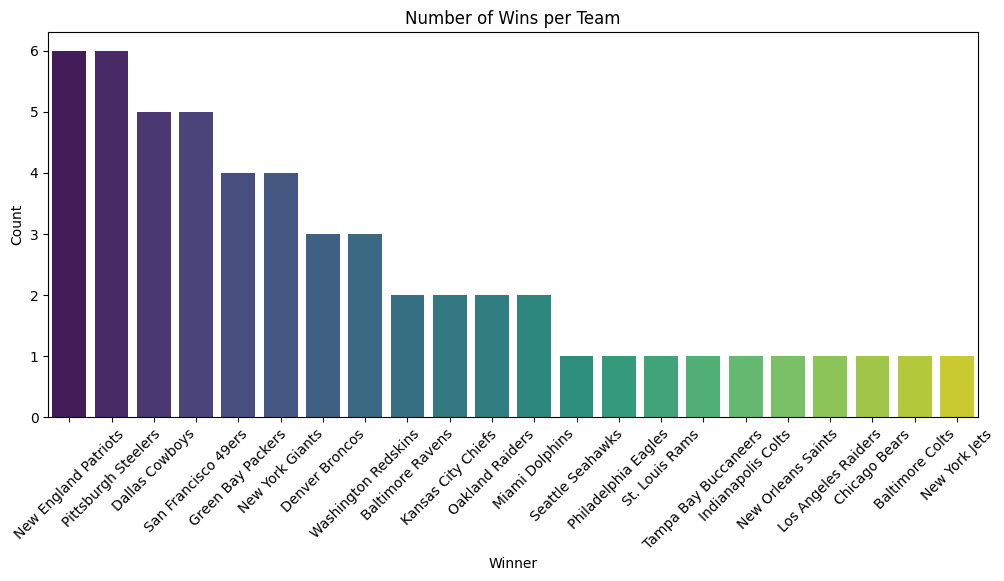

In [4]:
winning_count = superbowl_df['Winner'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=winning_count.index, y=winning_count.values, palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Wins per Team')
plt.ylabel('Count')
plt.show()

## 6.3 Losses per Team

C:\Users\ferna\AppData\Local\Temp\ipykernel_18516\3300987970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=losing_count.index, y=losing_count.values, palette='magma')


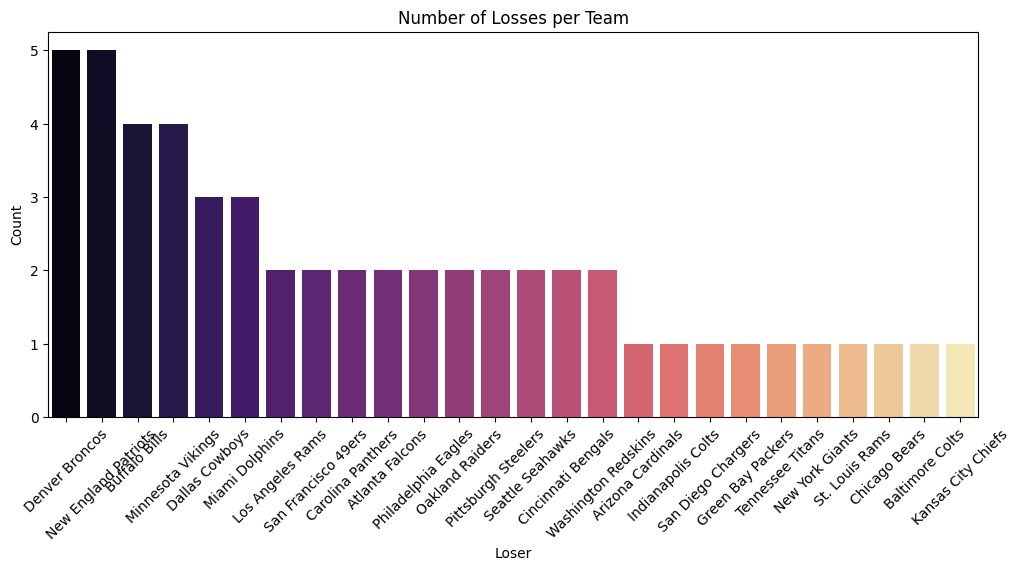

In [5]:
losing_count = superbowl_df['Loser'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(x=losing_count.index, y=losing_count.values, palette='magma')
plt.xticks(rotation=45)
plt.title('Number of Losses per Team')
plt.ylabel('Count')
plt.show()

## 6.4 Winning Margin

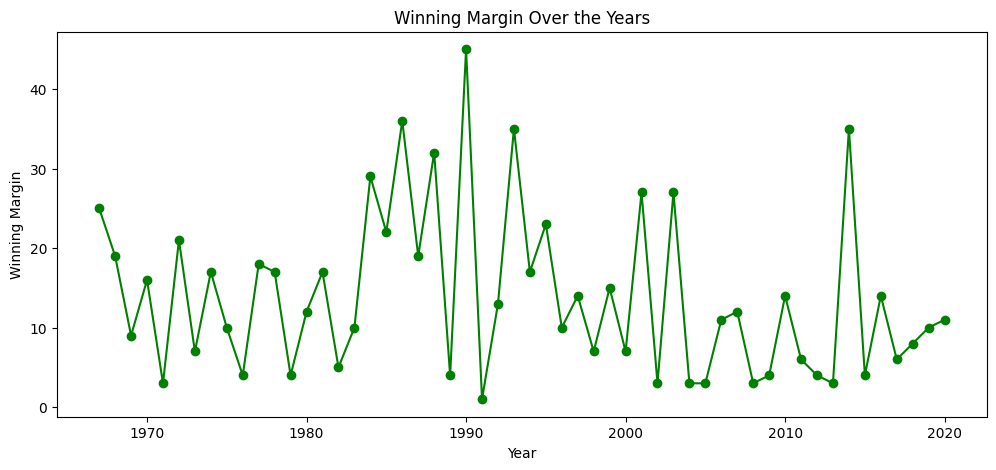

In [6]:
superbowl_df['Winning Margin'] = superbowl_df['Winner Pts'] - superbowl_df['Loser Pts']
plt.figure(figsize=(12,5))
plt.plot(superbowl_df['Year'], superbowl_df['Winning Margin'], marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Winning Margin')
plt.title('Winning Margin Over the Years')
plt.show()

## 6.5 Top 5 MVPs

C:\Users\ferna\AppData\Local\Temp\ipykernel_18516\313042728.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mvp.index, y=top_mvp.values, palette='coolwarm')


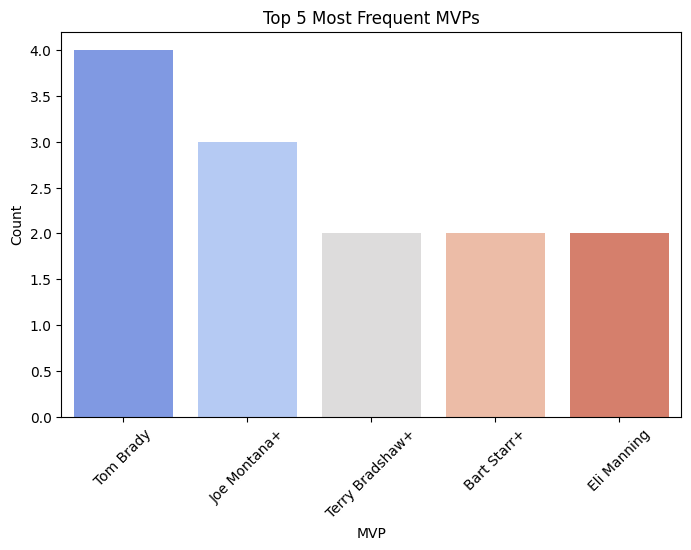

In [7]:
top_mvp = superbowl_df['MVP'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_mvp.index, y=top_mvp.values, palette='coolwarm')
plt.title('Top 5 Most Frequent MVPs')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


## 6.6 Stadium & City Distribution

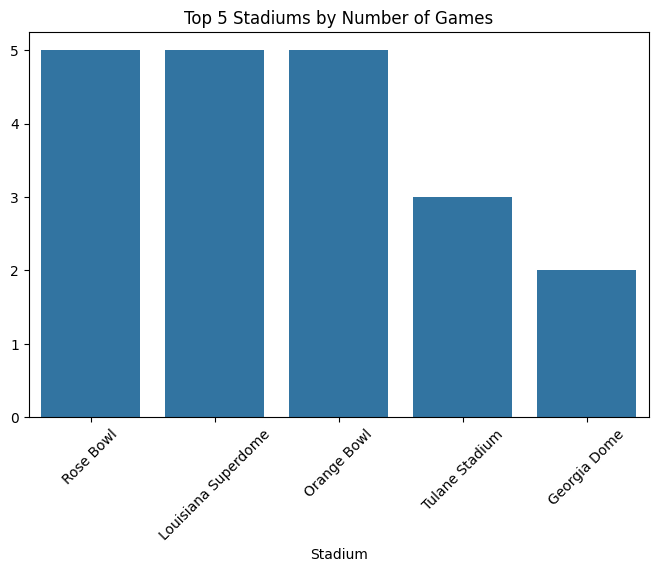

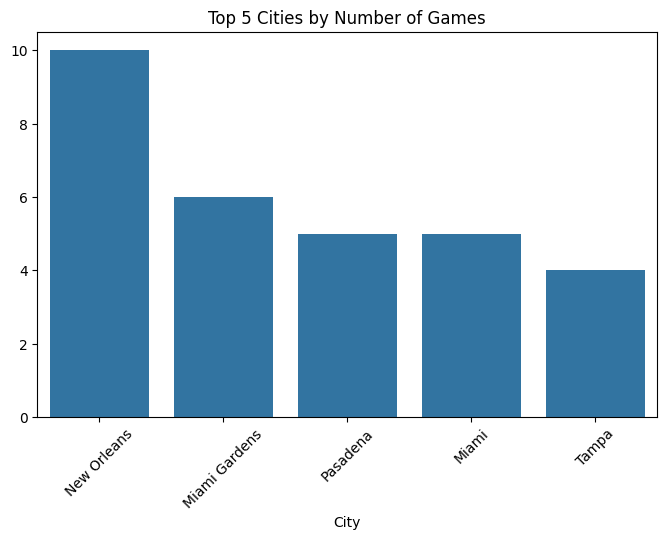

In [8]:
top_stadiums = superbowl_df['Stadium'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_stadiums.index, y=top_stadiums.values)
plt.title('Top 5 Stadiums by Number of Games')
plt.xticks(rotation=45)
plt.show()

top_cities = superbowl_df['City'].value_counts().head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.title('Top 5 Cities by Number of Games')
plt.xticks(rotation=45)
plt.show()



---

# 7. Summary

- The dataset contains 54 Super Bowl games with **complete records** (no missing values).

- Most frequent winners: ***New England Patriots***, ***Pittsburgh Steelers***.

- Some teams have frequent losses: ***Denver Broncos***, ***New England Patriots***.

- Points scored by winning and losing teams have **varied over time**, with some high scoring outliers.

- MVP distribution shows certain players appear multiple times.

- Stadiums and cities hosting games are concentrated in a few locations.

> This EDA provides the foundation for the **subsequent machine learning notebooks**: classification, clustering, and association rules.